In [1]:
from base64 import b64encode
import json
import requests
import os
import dotenv
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

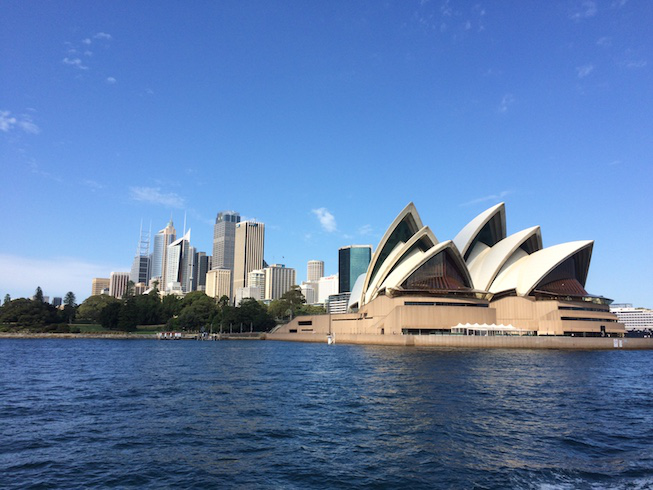

In [2]:
# 対象の画像
im = Image.open('./sydney.jpg', 'r')
im

In [3]:
# .env読み込み
dotenv.load_dotenv('./.env')
# key取得
api_key = os.environ.get('API_KEY')

In [21]:
endpoint_url = 'https://vision.googleapis.com/v1/images:annotate'
# 画像ファイルの読み込み
f = open('./sydney.jpg', 'rb')
# base64にエンコード
ctxt = b64encode(f.read()).decode()

In [20]:
img_requests = [{
    'image': {'content': ctxt},
    'features': [{
        'type': 'LANDMARK_DETECTION', # ランドマーク検知を指定
        'maxResults': 5 # 最大出力数
    }]
}]

In [26]:
# リクエスト送信
response = requests.post(endpoint_url,
                         data=json.dumps({'requests': img_requests}).encode(),
                         params={'key': api_key},
                         headers={'Content-Type': 'application/json'})

In [32]:
# 結果
print(json.dumps(response.json(), indent=4))

{
    "responses": [
        {
            "landmarkAnnotations": [
                {
                    "mid": "/m/06y57",
                    "description": "Sydney",
                    "score": 0.42621508,
                    "boundingPoly": {
                        "vertices": [
                            {
                                "x": 20,
                                "y": 228
                            },
                            {
                                "x": 602,
                                "y": 228
                            },
                            {
                                "x": 602,
                                "y": 327
                            },
                            {
                                "x": 20,
                                "y": 327
                            }
                        ]
                    },
                    "locations": [
                        {
                            "l

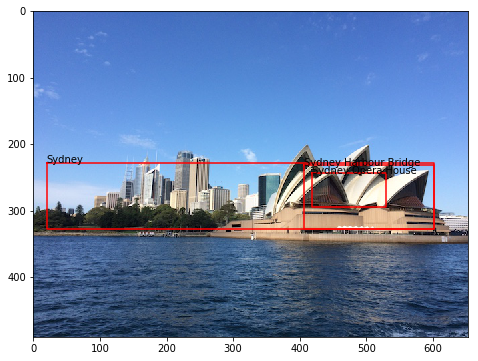

In [70]:
# 検知結果の描画
plt.figure(figsize=(8, 6))
plt.imshow(im)
# 検知結果の描画
data = response.json()['responses'][0]['landmarkAnnotations']
for row in data:
    description = row['description'] # 名称
    data_ = []
    for bp in row['boundingPoly']['vertices']:
        data_.append([bp['x'], bp['y']]) # 座標
    # 四角で囲むので、終点(=始点)を追加
    data_.append(data_[0])
    graph_data = np.array(data_).T
    
    plt.plot(graph_data[0], graph_data[1], c='r')
    plt.text(graph_data[0][0], graph_data[1][0], description)


違う角度から見ると橋が見えるらしい。